# Explore here

In [3]:
# Your code here
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math
# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
datos = pd.read_csv(url, sep= ";")

# Mostrar las primeras filas del DataFrame
datos.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [4]:
datos.shape

(41188, 21)

In [5]:
datos.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [6]:
datos.duplicated().sum()

np.int64(12)

In [7]:
data_limpio = datos.drop_duplicates()
print(data_limpio.shape)
data_limpio.head()

(41176, 21)


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [8]:
data_limpio = datos.drop(["nr.employed"], axis = 1, inplace = False)
data_limpio.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m   y  
0           1.1          93.994          -36.4      4.857  no  
1           1.1          93.994          -36.4      4.857  no  
2           1.1          93.994          -36.4      4.857  no  
3           1.1          93.994          -36.4      4.857  no  
4           1.1          93.994          -36.4      4.857  no

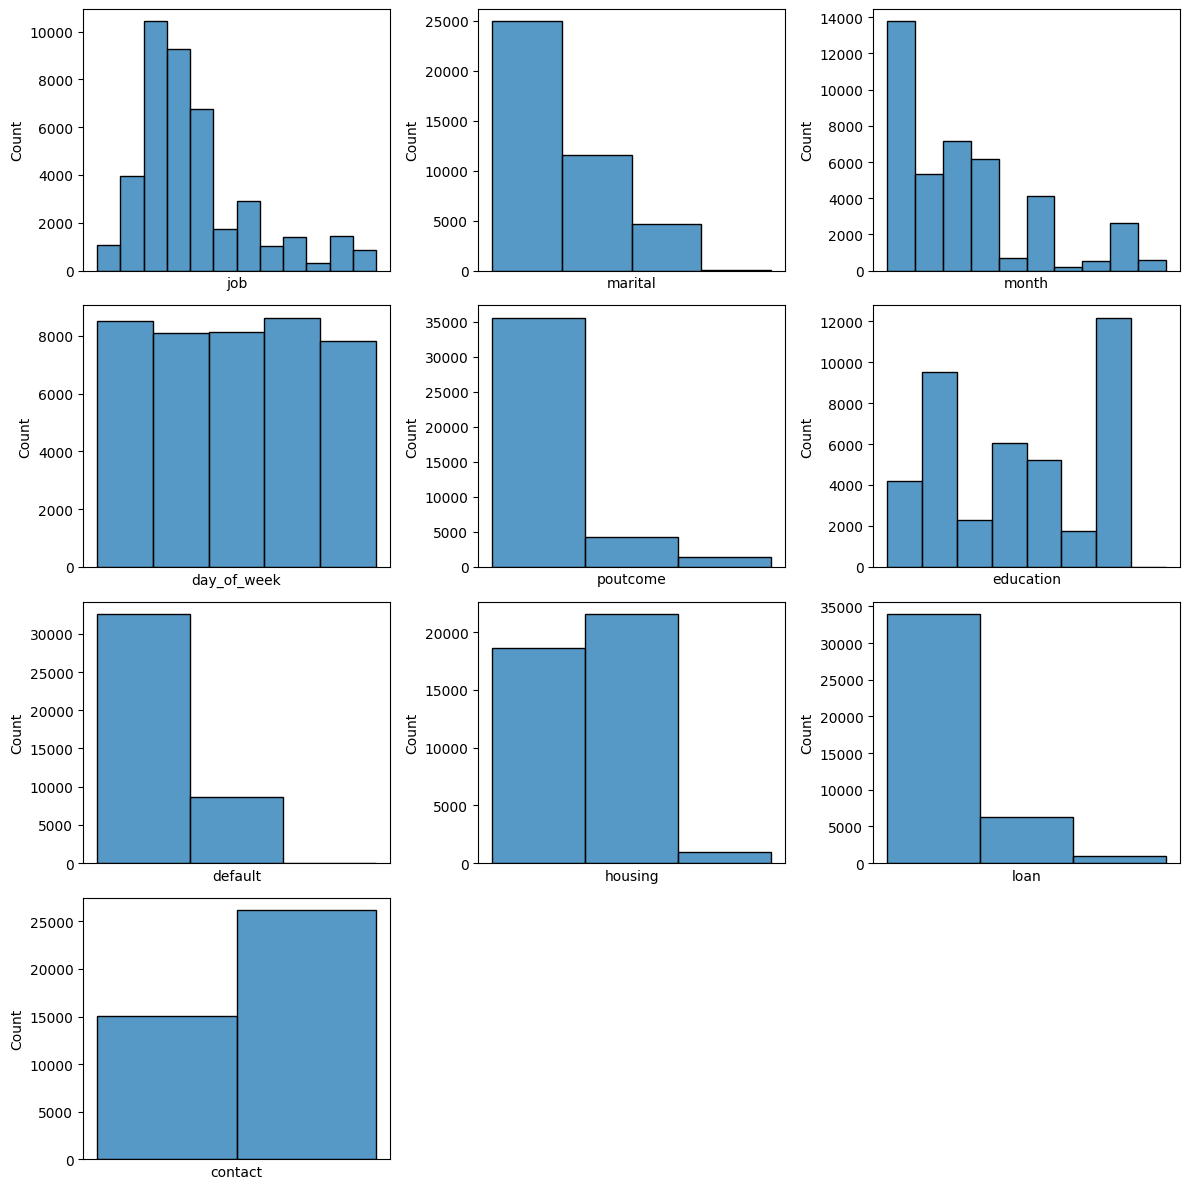

In [9]:
#Automatizacion Categoricos
categorical_variables = ["job", "marital","month", "day_of_week", "poutcome", "education", "default", "housing", "loan",	"contact"]

# Calcular filas y columnas para organizar los gráficos en 3 por fila
num_cols = 3

num_rows = math.ceil(len(categorical_variables) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

# Asegurar que axes es siempre una lista bidimensional
axes = axes.reshape(num_rows, num_cols) if num_rows > 1 else [axes]

# Generar los gráficos
col_index = 0
for row in range(num_rows):
    for col in range(num_cols):
        if col_index < len(categorical_variables):
            sns.histplot(data=data_limpio, x= categorical_variables[col_index], ax=axes[row][col])
            axes[row][col].set_xticks([])
            col_index += 1
        else:
            fig.delaxes(axes[row][col])  # Elimina gráficos vacíos
plt.tight_layout()
plt.show()



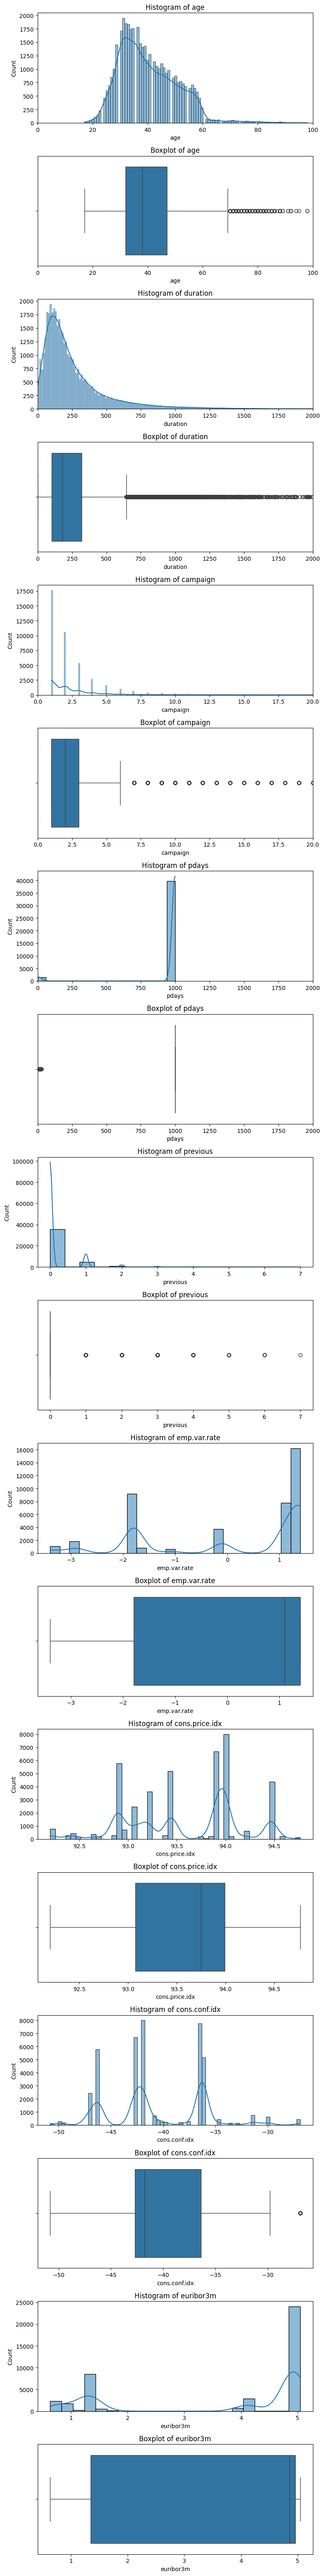

In [10]:
#Automatizacion Numerales
numericals_variables = ["age","duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]
 # Crear la figura con 1 columnas y 2 filas por variable.
fig, axis = plt.subplots(len(numericals_variables) * 2, 1, figsize=(8, len(numericals_variables) * 7))
    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
x_limits = {
        'age': (0, 100),   # Rango para el histograma y el boxplot de columna1...
        'duration': (0, 2000),
        'campaign': (0, 20),
        'pdays': (0, 2000),
        # Añadir más columnas y rangos si es necesario...
    }
    # Iterar sobre cada columna del DataFrame
for i, col in enumerate(numericals_variables):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = data_limpio, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma
        # Boxplot en la segunda fila
        sns.boxplot(data = data_limpio, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot
plt.tight_layout()
plt.show()

In [12]:
data_limpio["y_n"] = pd.factorize(data_limpio["y"])[0]

y_transformation_rules = {row["y"]: row["y_n"] for _, row in data_limpio[["y", "y_n"]].drop_duplicates().iterrows()}

import json

with open("y_transformation_rules.json", "w") as f:
  json.dump(y_transformation_rules, f)

# ----------------------------------------------------------------------------------
# EN PRODUCCIÓN (CUANDO HAYÁIS ENTRENADO EL MODELO Y OS LLEGUEN DATOS NUEVOS) HACÉIS:

with open("y_transformation_rules.json", "r") as f:
  y_transformation_rules = json.load(f)

data_limpio["y_n"] = data_limpio["y"].apply(lambda x: y_transformation_rules[x])

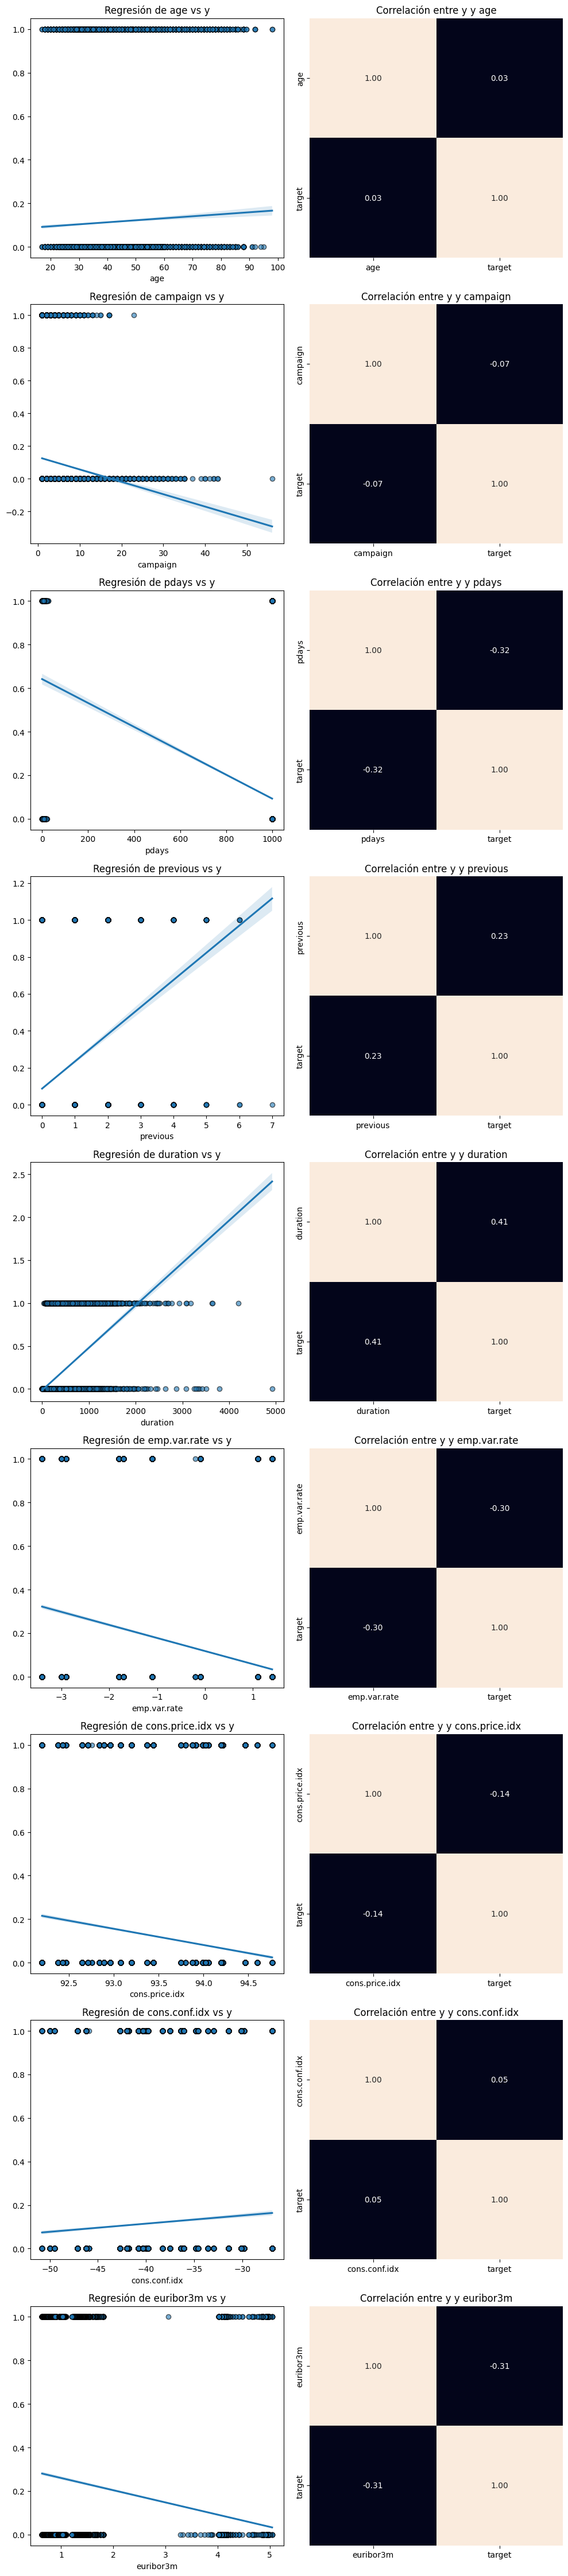

In [13]:
# # Automatizacion Numerico-Numerico

# Crear la variable objetivo (categórica)
target = data_limpio["y"]

# Factorizar el target y guardar el nombre de la columna
target_numeric = pd.factorize(target)[0]  # Convertir a valores numéricos
target_name = target.name  # Guardar el nombre de la columna original

# Variables numéricas
num_variables = ["age", "campaign", "pdays", "previous", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]

# Crear la figura y los ejes
num_rows = len(num_variables)
fig, axis = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

# Crear gráficos para cada variable
for i, var in enumerate(num_variables):
    # Scatterplot con regresión lineal
    sns.regplot(ax=axis[i, 0], data=data_limpio, x=var, y=target_numeric, scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
    axis[i, 0].set_title(f"Regresión de {var} vs {target_name}")
    
    # Heatmap de correlación
    correlation_data = data_limpio[[var]].assign(target=target_numeric)  # Crear un DataFrame con la variable y el target
    sns.heatmap(correlation_data.corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=False)
    axis[i, 1].set_title(f"Correlación entre {target_name} y {var}")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [14]:
# job = data_limpio["job"].unique().tolist()
# marital = data_limpio["marital"].unique().tolist()
# day_of_week = data_limpio["day_of_week"].unique().tolist()
# month = data_limpio["month"].unique().tolist()
# poutcome = data_limpio["poutcome"].unique().tolist()
# default = data_limpio["default"].unique().tolist()
# housing = data_limpio["housing"].unique().tolist()
# loan = data_limpio["loan"].unique().tolist()
# contact = data_limpio["contact"].unique().tolist()

# job_transformation_rules = {job: idx for idx, job in enumerate(job)}
# marital_transformation_rules = {marital: idx for idx, marital in enumerate(marital)}
# day_of_week_transformation_rules = {day_of_week: idx for idx, day_of_week in enumerate(day_of_week)}
# month_transformation_rules = {month: idx for idx, month in enumerate(month)}
# poutcome_transformation_rules = {poutcome: idx for idx, poutcome in enumerate(poutcome)}
# default_transformation_rules = {default: idx for idx, default in enumerate(default)}
# housing_transformation_rules = {housing: idx for idx, housing in enumerate(housing)}
# loan_transformation_rules = {loan: idx for idx, loan in enumerate(loan)}
# contact_transformation_rules = {contact: idx for idx, contact in enumerate(contact)}

# with open("job_transformation_rules.json", "w") as f:
#     json.dump(job_transformation_rules, f)
# with open("marital_transformation_rules.json", "w") as f:
#     json.dump(marital_transformation_rules, f)
# with open("day_of_week_transformation_rules.json", "w") as f:
#     json.dump(day_of_week_transformation_rules, f)
# with open("month_transformation_rules.json", "w") as f:
#     json.dump(month_transformation_rules, f)
# with open("poutcome_transformation_rules.json", "w") as f:
#     json.dump(poutcome_transformation_rules, f)
# with open("default_transformation_rules.json", "w") as f:
#     json.dump(default_transformation_rules, f)
# with open("housing_transformation_rules.json", "w") as f:
#     json.dump(housing_transformation_rules, f)
# with open("loan_transformation_rules.json", "w") as f:
#     json.dump(loan_transformation_rules, f)
# with open("contact_transformation_rules.json", "w") as f:
#     json.dump(contact_transformation_rules, f)
import pandas as pd
import json

# Aplicar pd.factorize a cada columna categórica
data_limpio["job"], job_labels = pd.factorize(data_limpio["job"])
data_limpio["marital"], marital_labels = pd.factorize(data_limpio["marital"])
data_limpio["day_of_week"], day_of_week_labels = pd.factorize(data_limpio["day_of_week"])
data_limpio["month"], month_labels = pd.factorize(data_limpio["month"])
data_limpio["poutcome"], poutcome_labels = pd.factorize(data_limpio["poutcome"])
data_limpio["default"], default_labels = pd.factorize(data_limpio["default"])
data_limpio["housing"], housing_labels = pd.factorize(data_limpio["housing"])
data_limpio["loan"], loan_labels = pd.factorize(data_limpio["loan"])
data_limpio["contact"], contact_labels = pd.factorize(data_limpio["contact"])

# Crear diccionarios de reglas de transformación
job_transformation_rules = {label: idx for idx, label in enumerate(job_labels)}
marital_transformation_rules = {label: idx for idx, label in enumerate(marital_labels)}
day_of_week_transformation_rules = {label: idx for idx, label in enumerate(day_of_week_labels)}
month_transformation_rules = {label: idx for idx, label in enumerate(month_labels)}
poutcome_transformation_rules = {label: idx for idx, label in enumerate(poutcome_labels)}
default_transformation_rules = {label: idx for idx, label in enumerate(default_labels)}
housing_transformation_rules = {label: idx for idx, label in enumerate(housing_labels)}
loan_transformation_rules = {label: idx for idx, label in enumerate(loan_labels)}
contact_transformation_rules = {label: idx for idx, label in enumerate(contact_labels)}

# Guardar las reglas de transformación en archivos JSON
with open("job_transformation_rules.json", "w") as f:
    json.dump(job_transformation_rules, f)
with open("marital_transformation_rules.json", "w") as f:
    json.dump(marital_transformation_rules, f)
with open("day_of_week_transformation_rules.json", "w") as f:
    json.dump(day_of_week_transformation_rules, f)
with open("month_transformation_rules.json", "w") as f:
    json.dump(month_transformation_rules, f)
with open("poutcome_transformation_rules.json", "w") as f:
    json.dump(poutcome_transformation_rules, f)
with open("default_transformation_rules.json", "w") as f:
    json.dump(default_transformation_rules, f)
with open("housing_transformation_rules.json", "w") as f:
    json.dump(housing_transformation_rules, f)
with open("loan_transformation_rules.json", "w") as f:
    json.dump(loan_transformation_rules, f)
with open("contact_transformation_rules.json", "w") as f:
    json.dump(contact_transformation_rules, f)

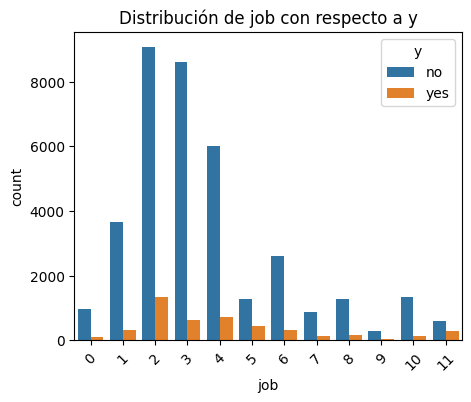

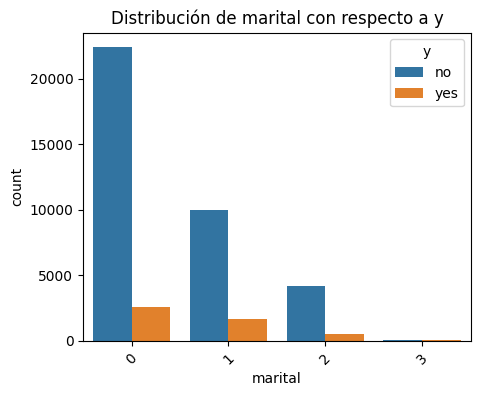

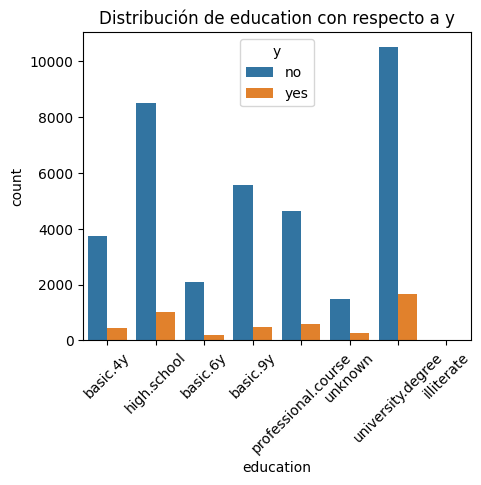

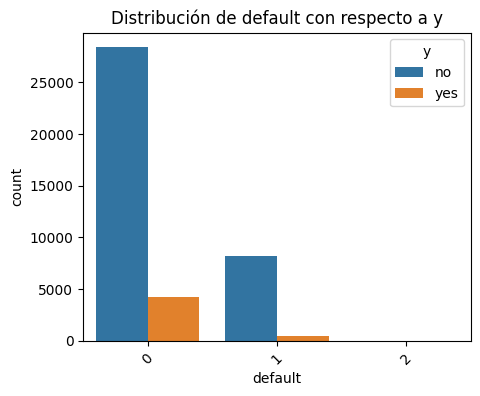

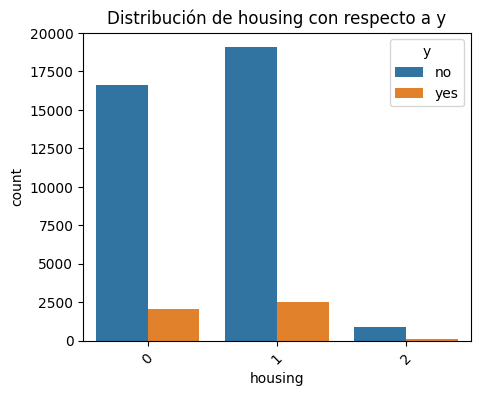

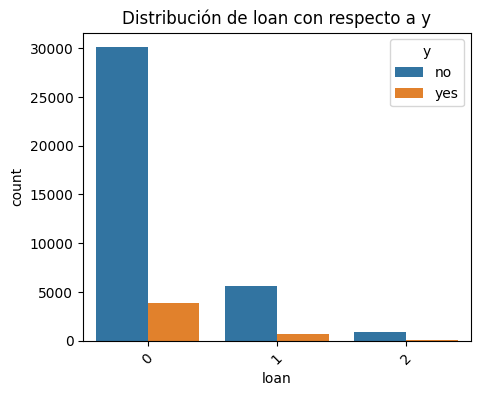

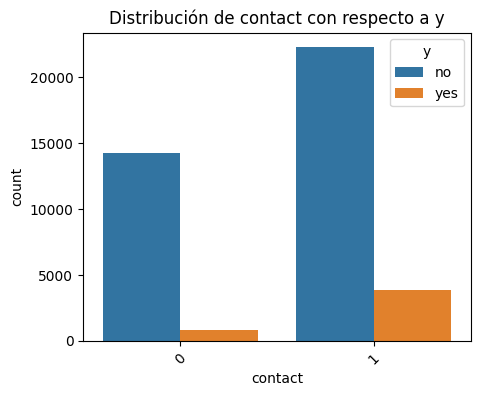

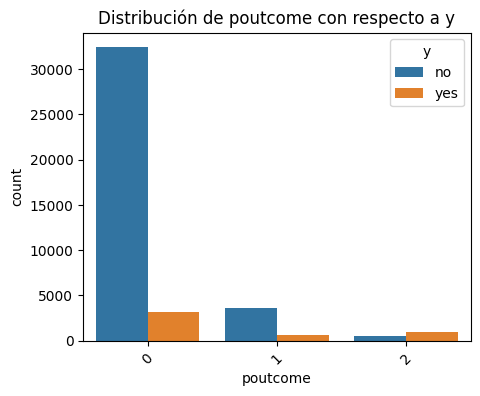

In [15]:
#Analisis categorico-categorico

# Lista de columnas categóricas
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome"]
# Crear gráficos automáticamente
for col in categorical_columns:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=data_limpio, x=col, hue="y")
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {col} con respecto a y")
    plt.show()


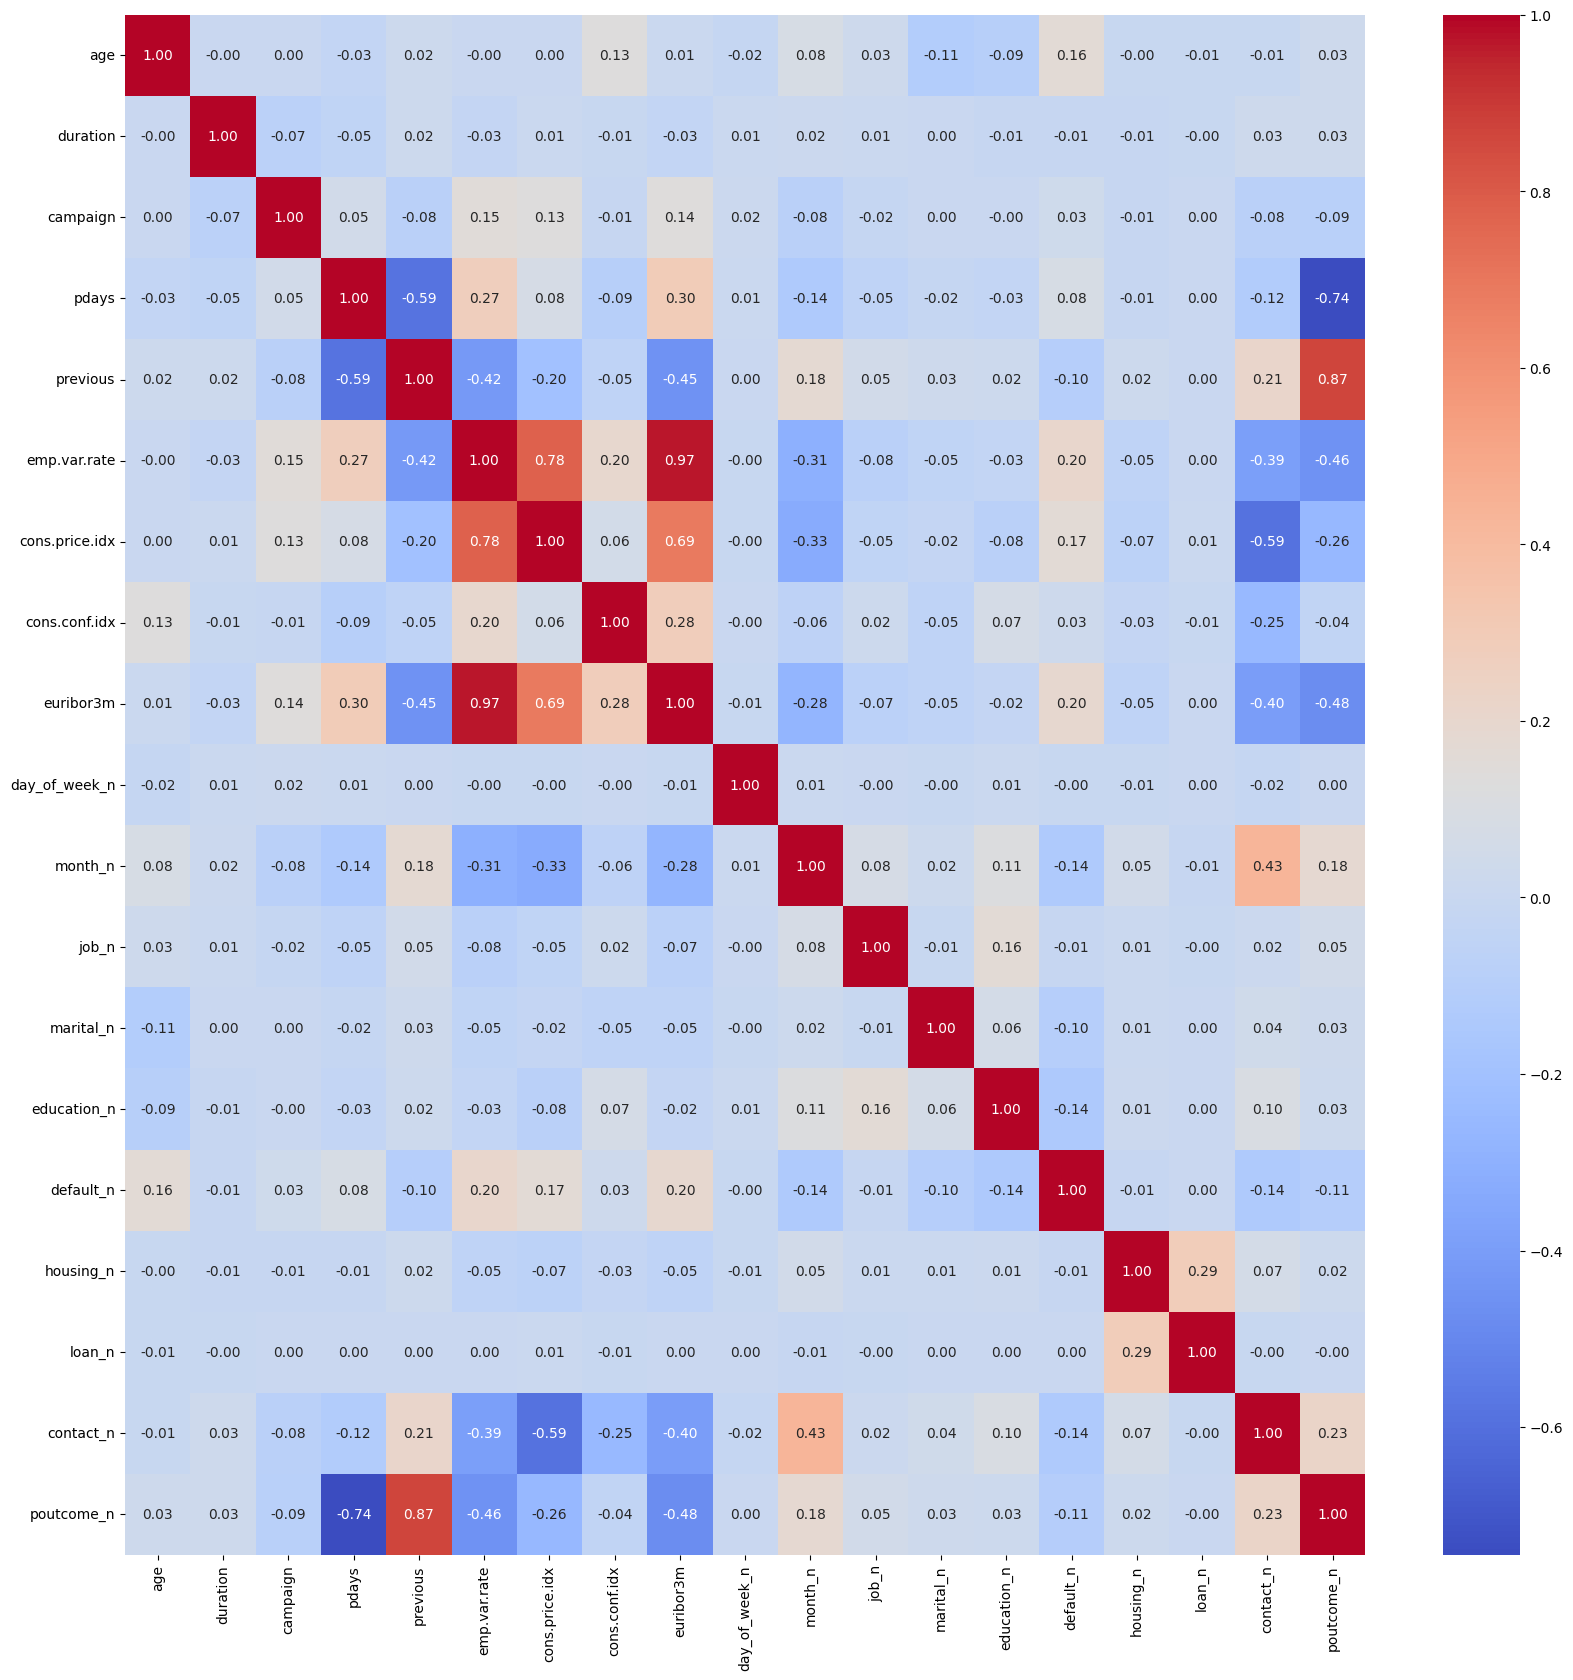

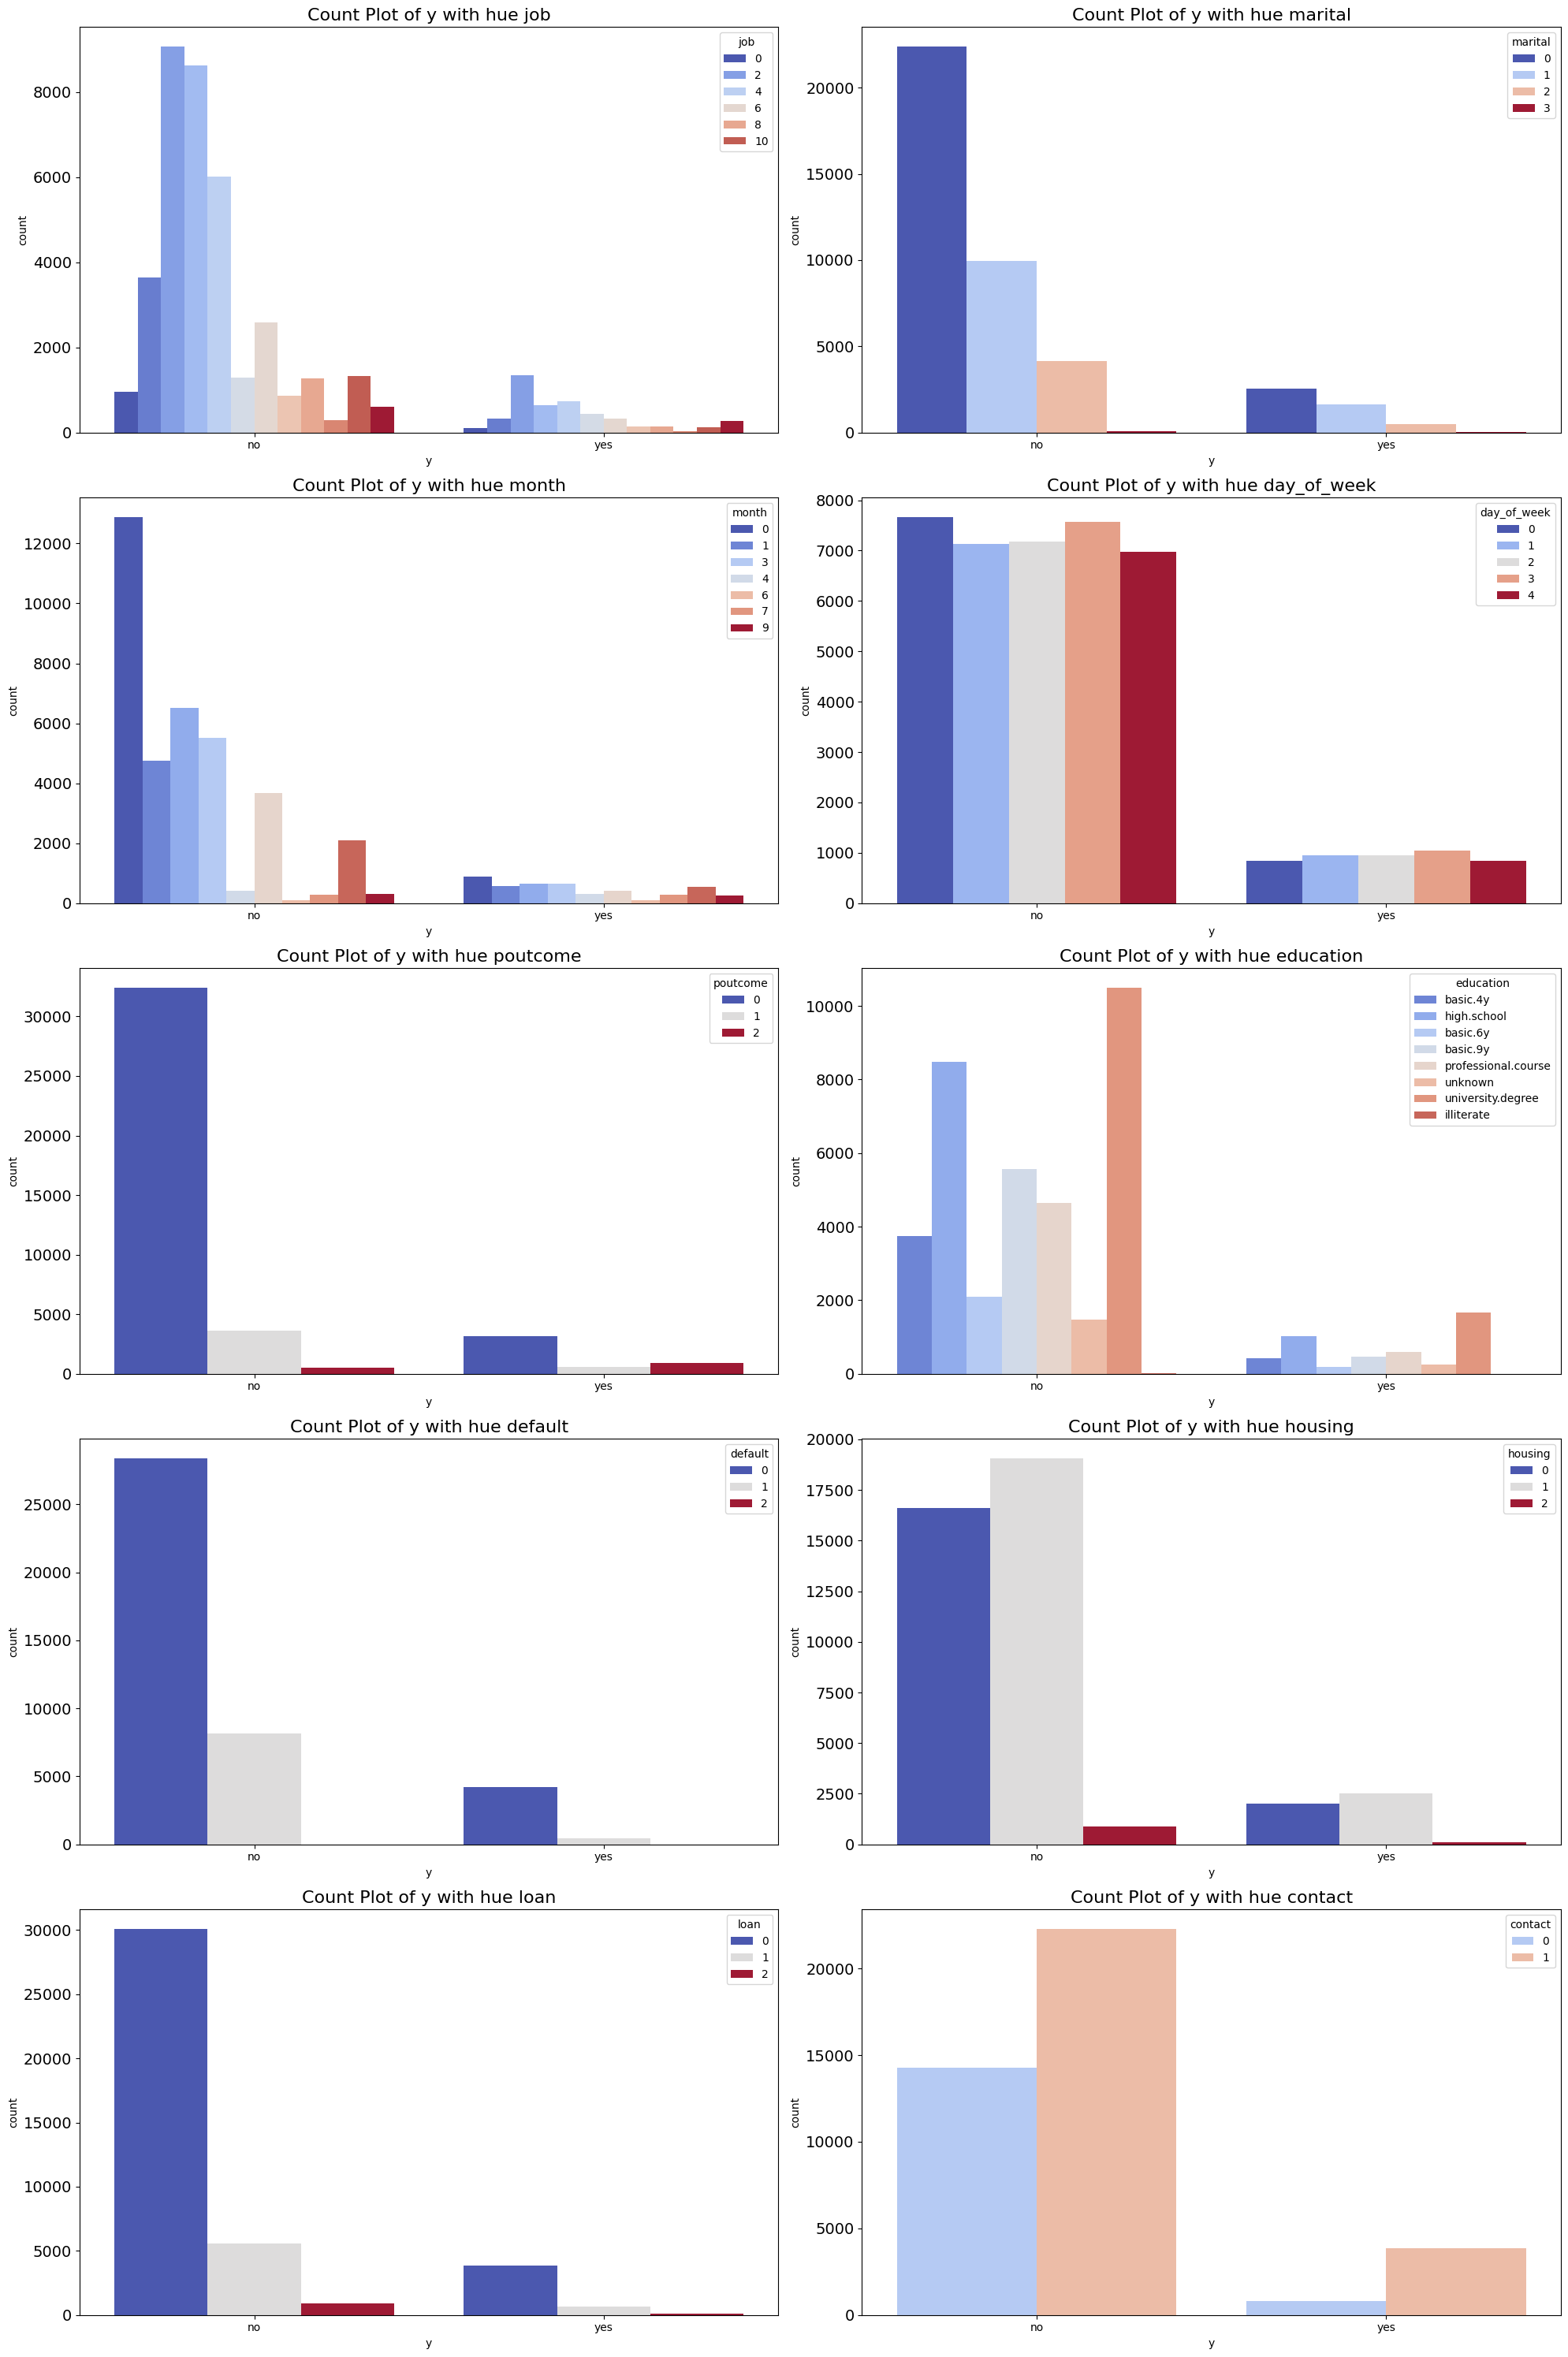

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#factorizamos las categóricas
data_limpio["job_n"] = pd.factorize(data_limpio["job"])[0]
data_limpio["marital_n"] = pd.factorize(data_limpio["marital"])[0]
data_limpio["education_n"] = pd.factorize(data_limpio["education"])[0]
data_limpio["default_n"] = pd.factorize(data_limpio["default"])[0]
data_limpio["housing_n"] = pd.factorize(data_limpio["housing"])[0]
data_limpio["loan_n"] = pd.factorize(data_limpio["loan"])[0]
data_limpio["contact_n"] = pd.factorize(data_limpio["contact"])[0]
data_limpio["poutcome_n"] = pd.factorize(data_limpio["poutcome"])[0]
data_limpio["day_of_week_n"] = pd.factorize(data_limpio["day_of_week"])[0]
data_limpio["month_n"] = pd.factorize(data_limpio["month"])[0]
total_numerical_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', "day_of_week_n", "month_n", 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'poutcome_n']
# Mapa de calor de la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(data_limpio[total_numerical_variables].corr(), annot=True, fmt='.2f', cmap="coolwarm")
# Gráficos de barras más grandes
plt.figure(figsize=(20, 30))  # Aumenta la altura para gráficos más grandes
num_cols = 2  # Número de columnas en el grid
num_rows = -(-len(categorical_variables) // num_cols)  # Calcula filas con techo de división
for i, col in enumerate(categorical_variables, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=data_limpio, x="y", hue=col, palette="coolwarm")
    plt.title(f"Count Plot of y with hue {col}", fontsize=16)
    #plt.xticks(fontsize=14, rotation=45)  # Aumenta tamaño y gira etiquetas
    plt.yticks(fontsize=14)
plt.tight_layout()  # Ajusta el layout para evitar superposiciones
plt.show()



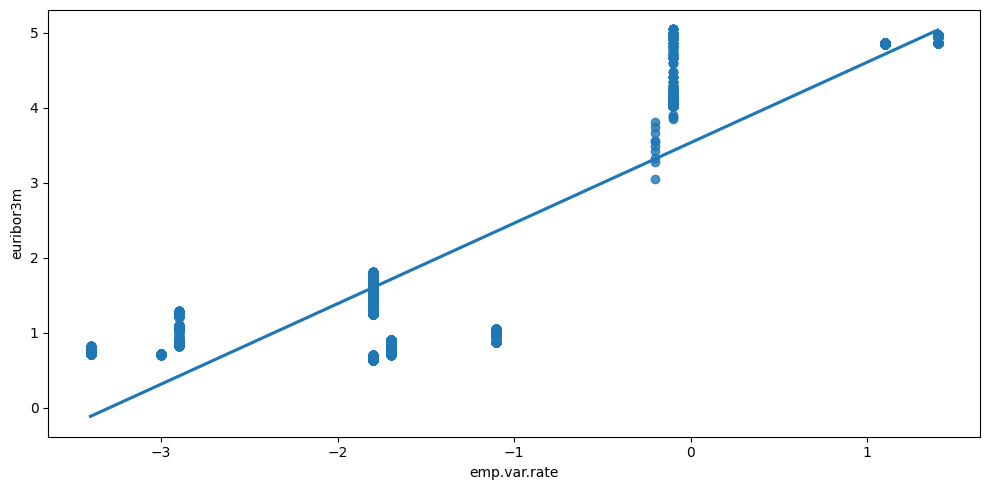

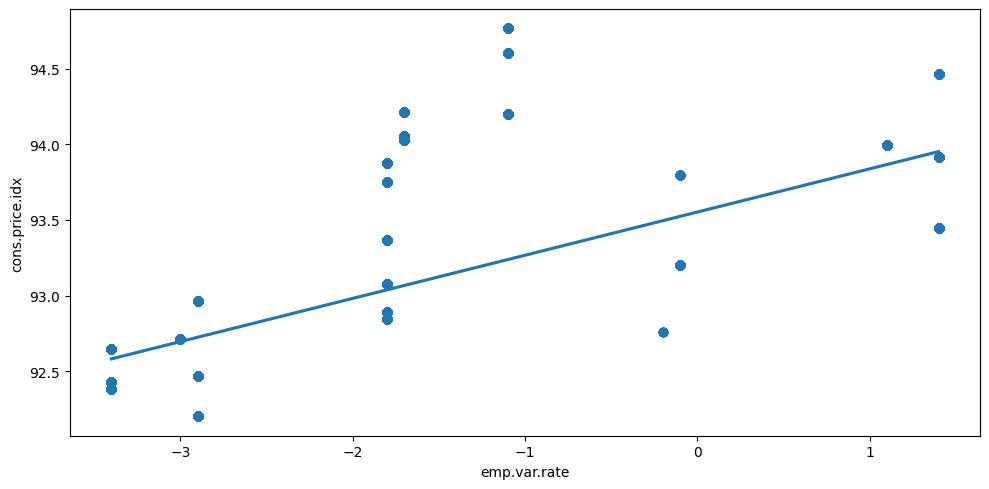

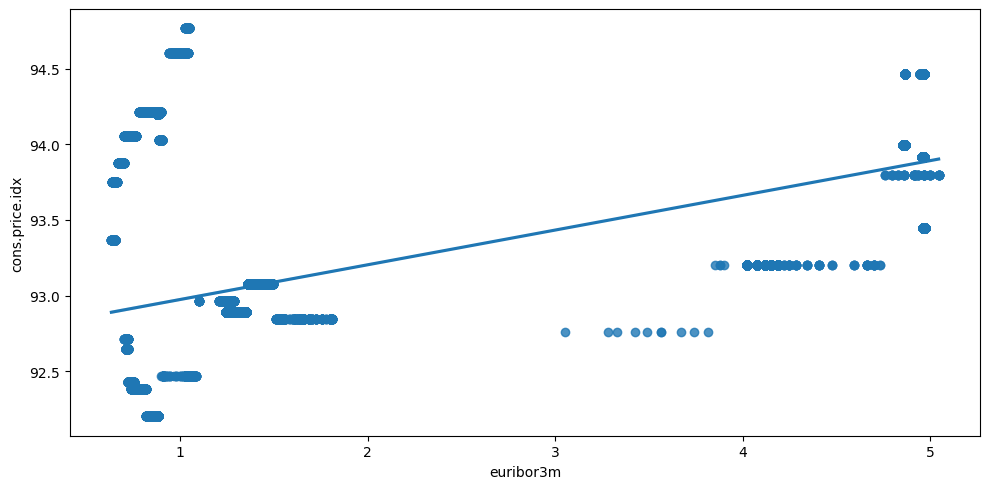

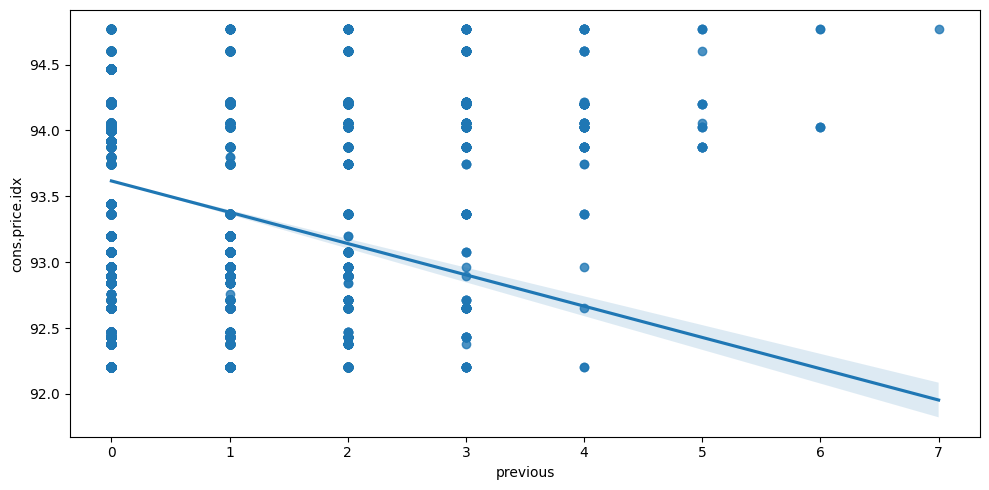

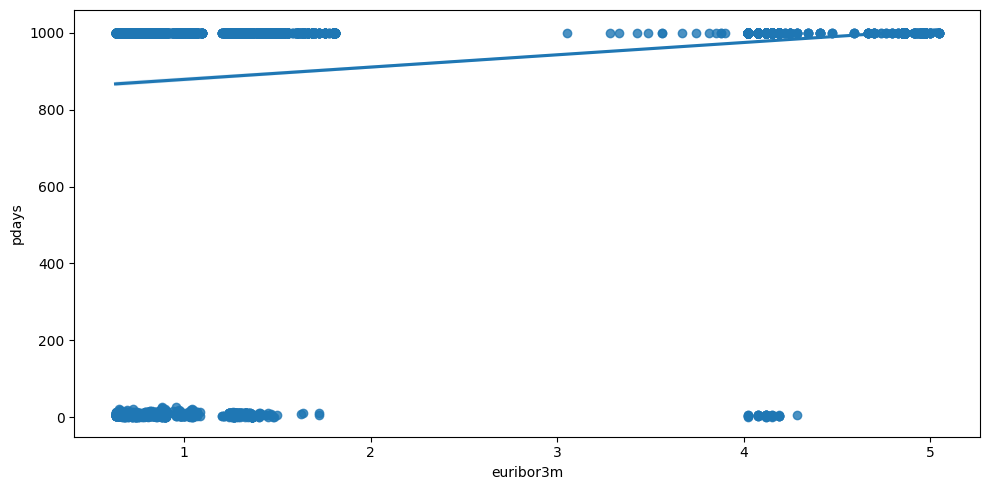

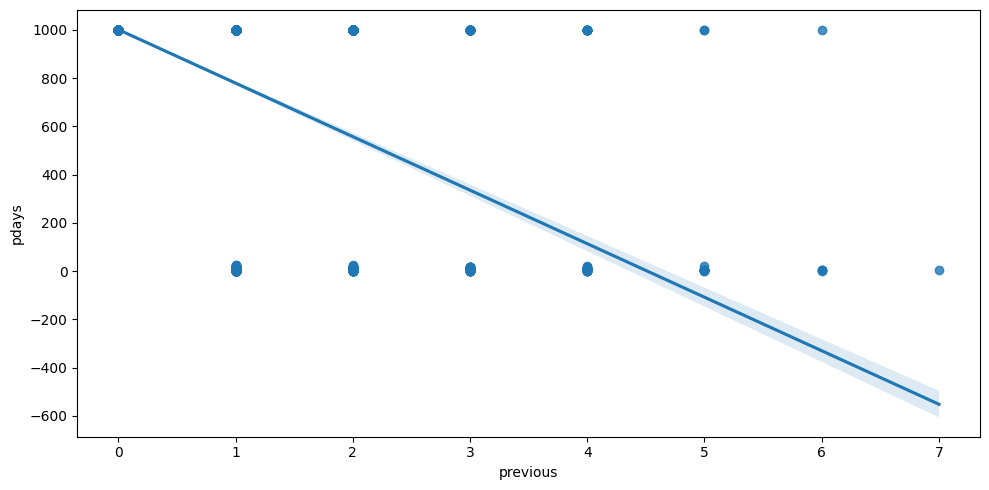

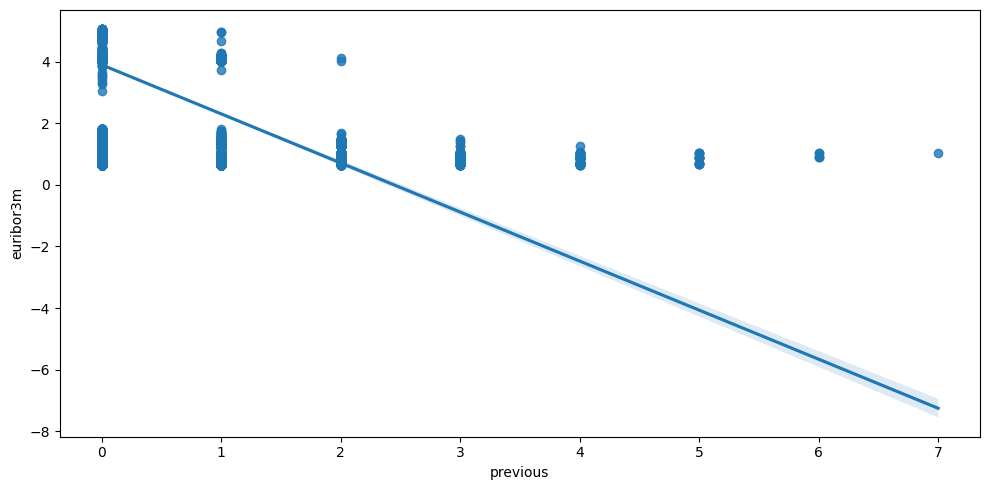

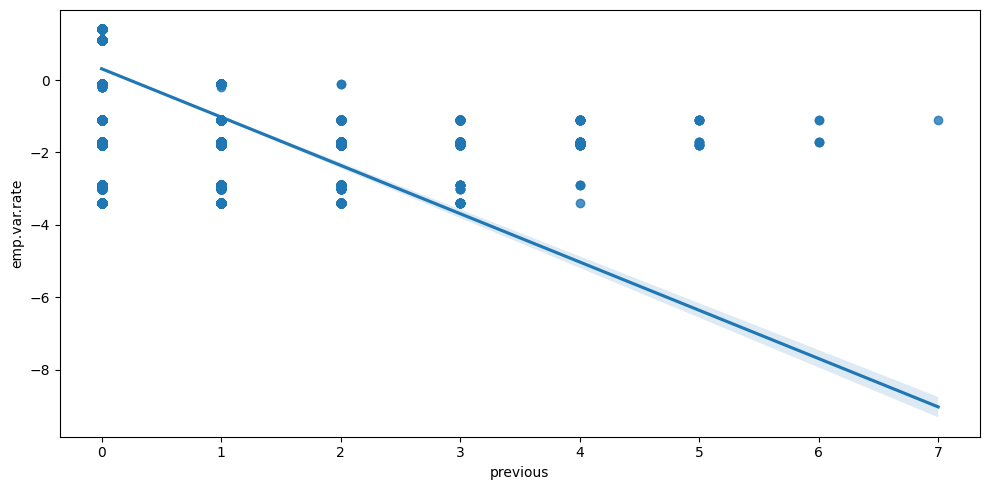

In [17]:
#gráfico 1
fig, axis = plt.subplots(figsize = (10, 5))
sns.regplot(data = data_limpio, x = "emp.var.rate", y = "euribor3m")
plt.tight_layout()
plt.show()
#gráfico 2
fig, axis = plt.subplots(figsize = (10, 5))
sns.regplot(data = data_limpio, x = "emp.var.rate", y = "cons.price.idx")
plt.tight_layout()
plt.show()
#gráfico 3
fig, axis = plt.subplots(figsize = (10, 5))
sns.regplot(data = data_limpio, x = "euribor3m", y = "cons.price.idx")
plt.tight_layout()
plt.show()
#gráfico 4
fig, axis = plt.subplots(figsize = (10, 5))
sns.regplot(data = data_limpio, x = "previous", y = "cons.price.idx")
plt.tight_layout()
plt.show()
#gráfico 5
fig, axis = plt.subplots(figsize = (10, 5))
sns.regplot(data = data_limpio, x = "euribor3m", y = "pdays")
plt.tight_layout()
plt.show()
#gráfico 6
fig, axis = plt.subplots(figsize = (10, 5))
sns.regplot(data = data_limpio, x = "previous", y = "pdays")
plt.tight_layout()
plt.show()
#gráfico 7
fig, axis = plt.subplots(figsize = (10, 5))
sns.regplot(data = data_limpio, x = "previous", y = "euribor3m")
plt.tight_layout()
plt.show()
#gráfico 8
fig, axis = plt.subplots(figsize = (10, 5))
sns.regplot(data = data_limpio, x = "previous", y = "emp.var.rate")
plt.tight_layout()
plt.show()


In [36]:
sns.pairplot(data = data_limpio)

In [18]:
data_limpio.describe

<bound method NDFrame.describe of        age  job  marital            education  default  housing  loan  \
0       56    0        0             basic.4y        0        0     0   
1       57    1        0          high.school        1        0     0   
2       37    1        0          high.school        0        1     0   
3       40    2        0             basic.6y        0        0     0   
4       56    1        0          high.school        0        0     1   
...    ...  ...      ...                  ...      ...      ...   ...   
41183   73    5        0  professional.course        0        1     0   
41184   46    3        0  professional.course        0        0     0   
41185   56    5        0    university.degree        0        1     0   
41186   44    4        0  professional.course        0        0     0   
41187   74    5        0  professional.course        0        1     0   

       contact  month  day_of_week  ...  job_n  marital_n  education_n  \
0            0 

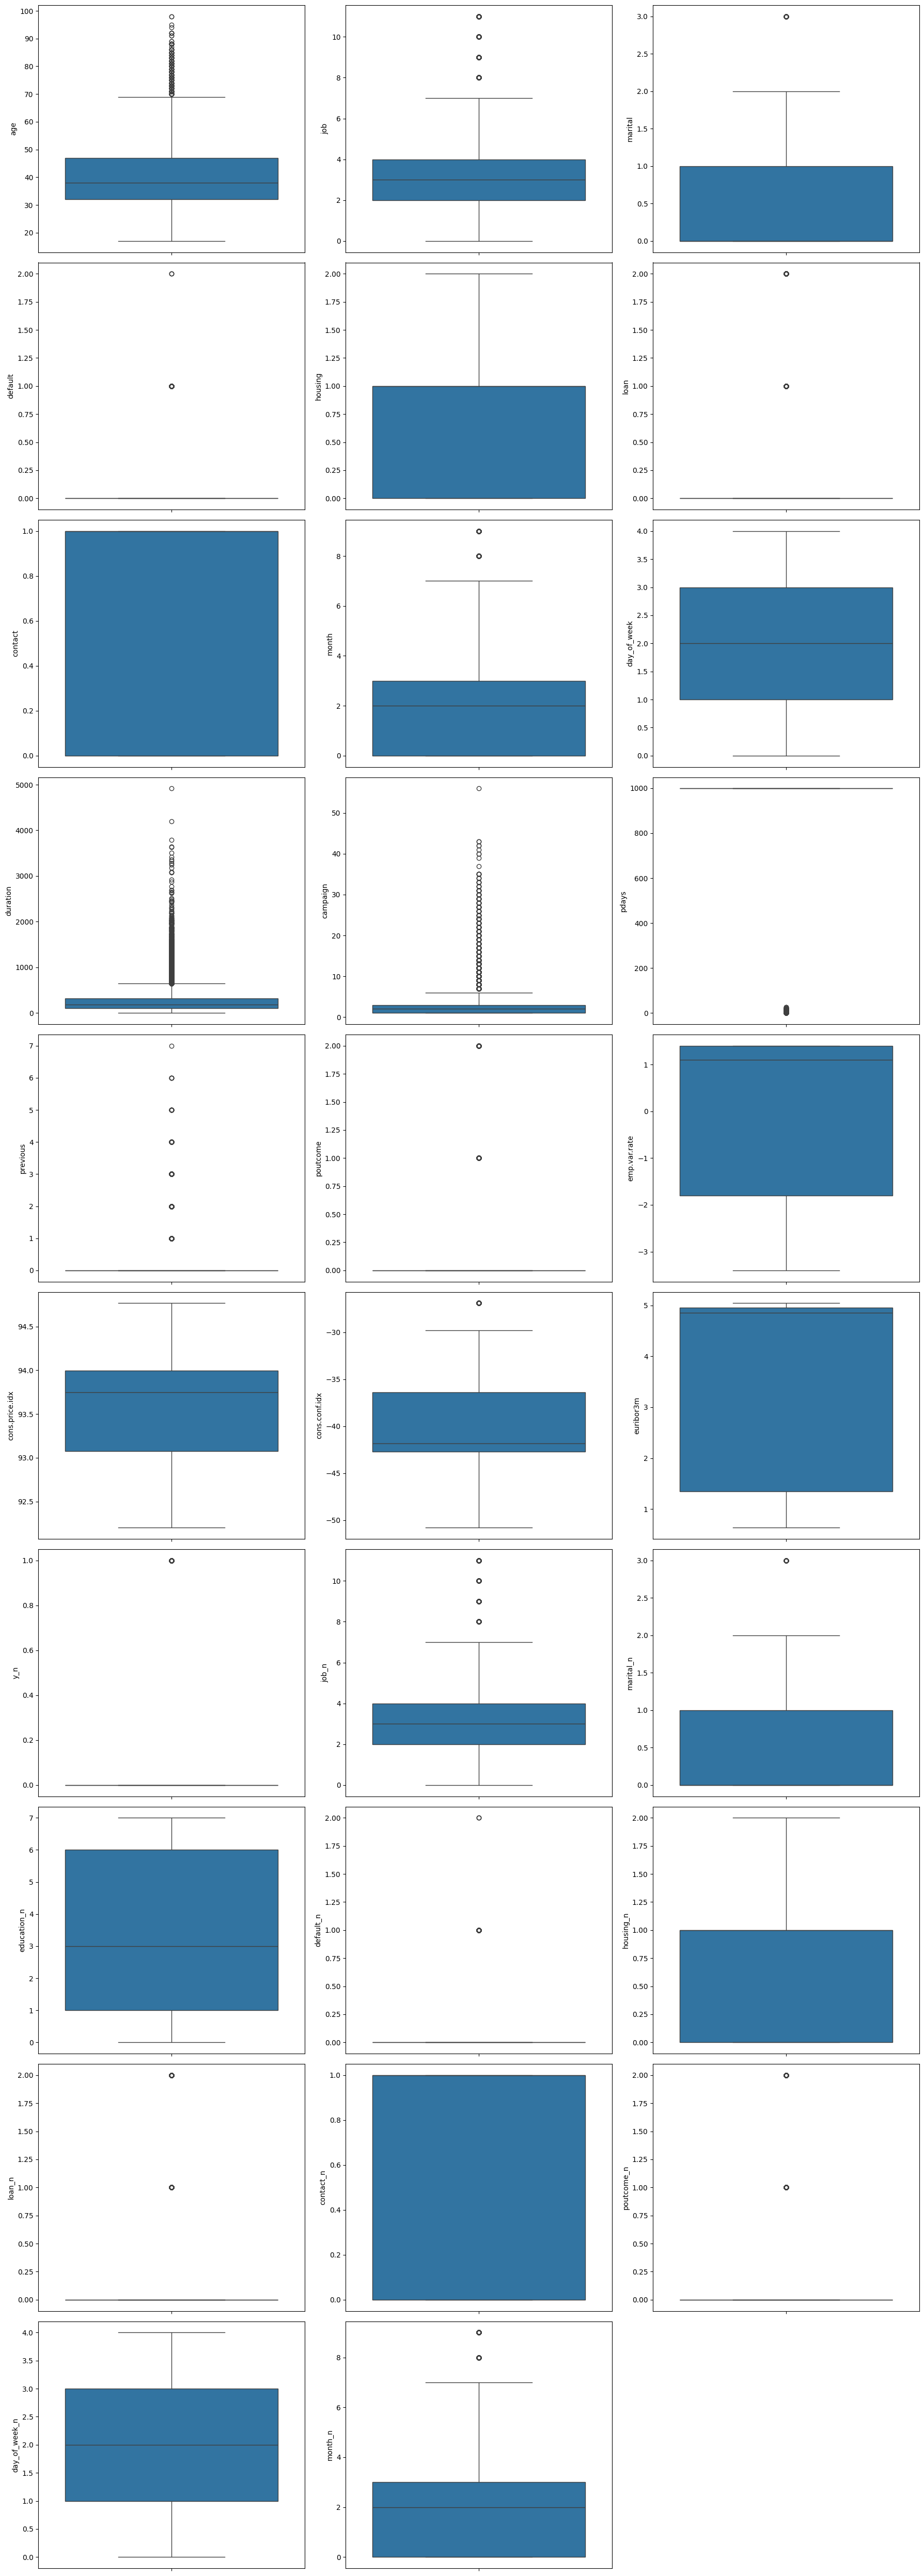

In [19]:
## Obtener las columnas numéricas del DataFrame
columns = data_limpio.select_dtypes(include=['number']).columns.tolist()
# Crear la figura y los ejes
num_rows = (len(columns) + 2) // 3  # Calcular el número de filas necesarias
#indicar número de columnas que deseas
num_cols = 3
fig, axis = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
# Recorrer las columnas y asignarlas a los ejes
for i, col in enumerate(columns):
    row = i // num_cols  # Calcula la fila
    col_index = i % num_cols  # Calcula el índice de la columna
    sns.boxplot(ax=axis[row, col_index], data=data_limpio, y=col)
# Eliminar ejes vacíos si los hay
for j in range(len(columns), num_rows * num_cols):
    fig.delaxes(axis.flatten()[j])  # Elimina los ejes vacíos
# Ajustar el diseño
plt.tight_layout()
# Mostrar los gráficos
plt.show()

In [21]:
import json
variables_outliers = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', "day_of_week_n", "month_n", 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'poutcome_n']
total_data_con_outliers = data_limpio.copy()
total_data_sin_outliers = data_limpio.copy()
def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]
outliers_dict = {}
for column in variables_outliers:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list
with open("outliers_replacement.json", "w") as f:
   json.dump(outliers_dict, f)
outliers_dict

{'age': [np.float64(9.5), np.float64(69.5)],
 'duration': [0, np.float64(644.5)],
 'campaign': [1, np.float64(6.0)],
 'pdays': [np.float64(999.0), np.float64(999.0)],
 'previous': [np.float64(0.0), np.float64(0.0)],
 'emp.var.rate': [-3.4, np.float64(6.200000000000001)],
 'cons.price.idx': [np.float64(91.69650000000001), np.float64(95.3725)],
 'cons.conf.idx': [-50.8, np.float64(-26.949999999999992)],
 'euribor3m': [0.634, np.float64(10.3865)],
 'day_of_week_n': [0, np.float64(6.0)],
 'month_n': [0, np.float64(7.5)],
 'job_n': [0, np.float64(7.0)],
 'marital_n': [0, np.float64(2.5)],
 'education_n': [0, np.float64(13.5)],
 'default_n': [np.float64(0.0), np.float64(0.0)],
 'housing_n': [0, np.float64(2.5)],
 'loan_n': [np.float64(0.0), np.float64(0.0)],
 'contact_n': [0, np.float64(2.5)],
 'poutcome_n': [np.float64(0.0), np.float64(0.0)]}

In [22]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
y_n               0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
contact_n         0
poutcome_n        0
day_of_week_n     0
month_n           0
dtype: int64

In [23]:
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
y_n               0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
contact_n         0
poutcome_n        0
day_of_week_n     0
month_n           0
dtype: int64

In [24]:
total_data_con_outliers["Credit"] = total_data_con_outliers["housing"] + total_data_con_outliers["loan"]
total_data_sin_outliers["Credit"] = total_data_sin_outliers["housing"] + total_data_sin_outliers["loan"]
total_data_con_outliers.head()

age  job  marital    education  default  housing  loan  contact  month  \
0   56    0        0     basic.4y        0        0     0        0      0   
1   57    1        0  high.school        1        0     0        0      0   
2   37    1        0  high.school        0        1     0        0      0   
3   40    2        0     basic.6y        0        0     0        0      0   
4   56    1        0  high.school        0        0     1        0      0   

   day_of_week  ...  marital_n  education_n  default_n  housing_n  loan_n  \
0            0  ...          0            0          0          0       0   
1            0  ...          0            1          1          0       0   
2            0  ...          0            1          0          1       0   
3            0  ...          0            2          0          0       0   
4            0  ...          0            1          0          0       1   

   contact_n  poutcome_n  day_of_week_n  month_n Credit  
0          0           0              0        0      0  
1          0           0              0        0      0  
2          0           0              0        0      1  
3          0           0              0        0      0  
4          0           0              0        0      1  

[5 rows x 32 columns]

In [26]:
from sklearn.model_selection import train_test_split

### ELEGIR LAS VARIABLES NUMÉRICAS (NO USAR LA TARGET)
num_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', "day_of_week_n", "month_n", 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'poutcome_n', "Credit"]
# Si deseas filtrar específicamente algunas columnas, puedes hacerlo aquí.
# Por ejemplo, si quieres excluir algunas columnas específicas:
excluded_columns = ["y_n"]  # Coloca aquí cualquier columna que quieras excluir
# Filtrar las columnas excluidas
num_variables = [col for col in num_variables if col not in excluded_columns]
# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("y_n", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("y_n", axis = 1)[num_variables]
y = total_data_con_outliers["y_n"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)
# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("/workspaces/bug-free-guacamole/models/Excel/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/workspaces/bug-free-guacamole/models/Excel/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/workspaces/bug-free-guacamole/models/Excel/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/workspaces/bug-free-guacamole/models/Excel/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/workspaces/bug-free-guacamole/models/Excel/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/bug-free-guacamole/models/Excel/y_test.xlsx", index = False)

In [27]:
from sklearn.preprocessing import StandardScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = StandardScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("/workspaces/bug-free-guacamole/models/Excel/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/workspaces/bug-free-guacamole/models/Excel/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("/workspaces/bug-free-guacamole/models/Excel/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/workspaces/bug-free-guacamole/models/Excel/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

age  duration  campaign     pdays  previous  emp.var.rate  \
12556 -0.001669 -0.631114 -0.206242  0.194661 -0.350902      0.838794   
35451 -0.864095 -0.546321  0.513676  0.194661 -0.350902     -1.199440   
30592  1.819007 -0.943306  1.233593  0.194661  1.677559     -1.199440   
17914  0.285806 -0.631114  0.873635  0.194661 -0.350902      0.838794   
3315  -0.097494  0.332441 -0.206242  0.194661 -0.350902      0.647709   

       cons.price.idx  cons.conf.idx  euribor3m  day_of_week_n   month_n  \
12556        0.589080      -0.472769   0.771354      -1.402425 -0.104938   
35451       -1.180760      -1.229916  -1.372028      -1.402425 -0.929383   
30592       -1.180760      -1.229916  -1.308581      -1.402425 -0.929383   
17914        0.589080      -0.472769   0.771930      -0.693804 -0.104938   
3315         0.720307       0.890097   0.713674       0.723439 -0.929383   

          job_n  marital_n  education_n  default_n  housing_n    loan_n  \
12556 -0.271142  -0.738185     -0.12745   1.948567   0.787712 -0.438945   
35451 -0.677848  -0.738185      1.24463  -0.512631  -1.056870 -0.438945   
30592  0.542271  -0.738185     -1.49953  -0.512631  -1.056870 -0.438945   
17914 -1.491260   2.126401     -0.12745  -0.512631   0.787712 -0.438945   
3315  -0.677848   0.694108     -1.04217   1.948567  -1.056870 -0.438945   

       contact_n  poutcome_n    Credit  
12556  -1.319656   -0.373487  0.280416  
35451   0.757773   -0.373487 -0.960647  
30592   0.757773    1.822906 -0.960647  
17914   0.757773   -0.373487  0.280416  
3315   -1.319656   -0.373487 -0.960647

In [28]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("/workspaces/bug-free-guacamole/models/Excel/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/workspaces/bug-free-guacamole/models/Excel/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("/workspaces/bug-free-guacamole/models/Excel/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/workspaces/bug-free-guacamole/models/Excel/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

age  duration  campaign  pdays  previous  emp.var.rate  \
12556  0.283951  0.019113  0.018182    1.0  0.000000      1.000000   
35451  0.172840  0.023587  0.054545    1.0  0.000000      0.333333   
30592  0.518519  0.002643  0.090909    1.0  0.142857      0.333333   
17914  0.320988  0.019113  0.072727    1.0  0.000000      1.000000   
3315   0.271605  0.069947  0.018182    1.0  0.000000      0.937500   

       cons.price.idx  cons.conf.idx  euribor3m  day_of_week_n   month_n  \
12556        0.669135       0.338912   0.980730           0.00  0.222222   
35451        0.269680       0.192469   0.138291           0.00  0.000000   
30592        0.269680       0.192469   0.163228           0.00  0.000000   
17914        0.669135       0.338912   0.980957           0.25  0.222222   
3315         0.698753       0.602510   0.958059           0.75  0.000000   

          job_n  marital_n  education_n  default_n  housing_n  loan_n  \
12556  0.272727   0.000000     0.428571        0.5        0.5     0.0   
35451  0.181818   0.000000     0.857143        0.0        0.0     0.0   
30592  0.454545   0.000000     0.000000        0.0        0.0     0.0   
17914  0.000000   0.666667     0.428571        0.0        0.5     0.0   
3315   0.181818   0.333333     0.142857        0.5        0.0     0.0   

       contact_n  poutcome_n  Credit  
12556        0.0         0.0    0.25  
35451        1.0         0.0    0.00  
30592        1.0         0.5    0.00  
17914        1.0         0.0    0.25  
3315         0.0         0.0    0.00